Install missing packages:

In [24]:
!pip install matplotlib 
!pip install opencv-python
!pip install scikit-learn
!pip install pandas
!pip install Pillow
!pip install regex
!pip install scikit-image


Import packages:

In [25]:

import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
import pandas as pd
from PIL import Image
import re
import json
import os
import platform
import subprocess
import time
from IPython.display import Markdown
import cv2
from skimage import exposure



Enhance contrast to make clouds more easily discernible


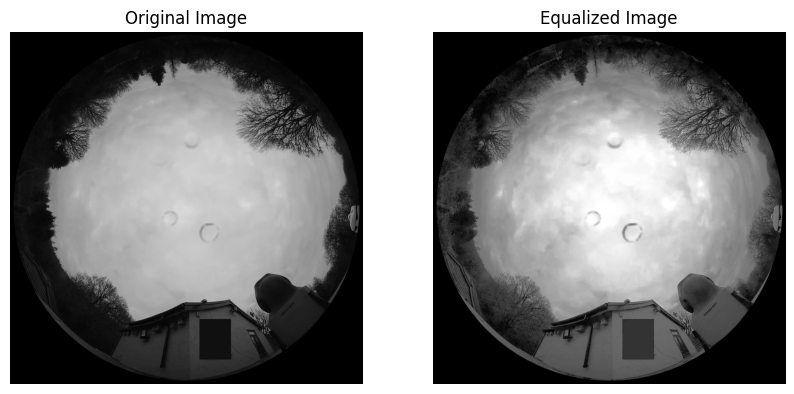

In [26]:
# Load the image
image_path = r"C:\Users\Emanu\Desktop\entropy0\calibration\registering_ui\registering_prototype_ui\original_images_\f1707140866_fisheye_-1.0_-1.0_0.0.png"

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(original_image)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")

plt.show()


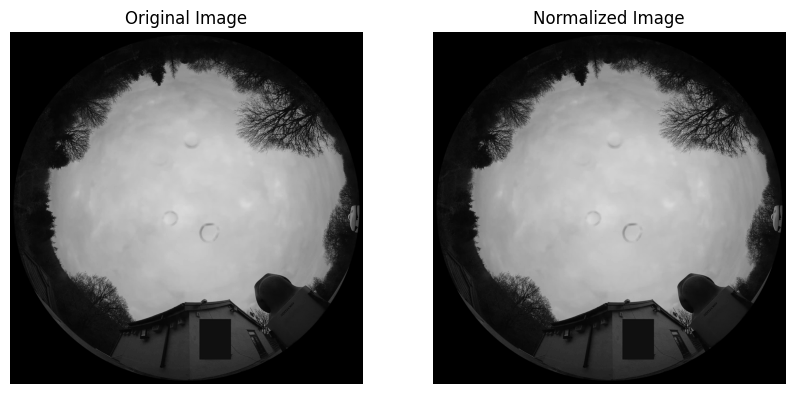

In [27]:

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Normalize the image using linear contrast stretching
min_intensity = np.min(original_image)
max_intensity = np.max(original_image)

normalized_image = cv2.normalize(original_image, None, 0, 255, cv2.NORM_MINMAX)

# Display the original and normalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(normalized_image, cmap="gray")
plt.title("Normalized Image")
plt.axis("off")

plt.show()


In [28]:

original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create a CLAHE object (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Apply CLAHE to the image
clahe_image = clahe.apply(original_image)



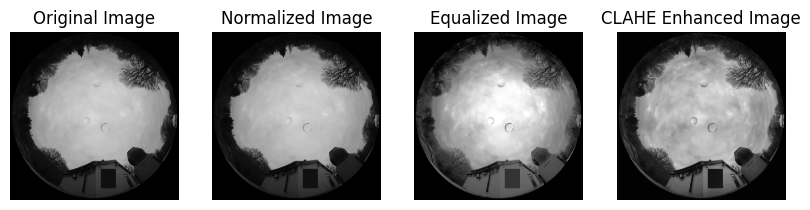

In [29]:
# Display the original and CLAHE-enhanced images
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(original_image, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(normalized_image, cmap="gray")
plt.title("Normalized Image")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(equalized_image, cmap="gray")
plt.title("Equalized Image")
plt.axis("off")


plt.subplot(1, 4, 4)
plt.imshow(clahe_image, cmap="gray")
plt.title("CLAHE Enhanced Image")
plt.axis("off")

plt.show()


# Iterate through all PNG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):
        # Load the original image
        original_image = cv2.imread(os.path.join(image_folder, filename), cv2.IMREAD_GRAYSCALE)

        # Apply various contrast enhancement methods
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        clahe_image = clahe.apply(original_image)

        gamma = 1.5
        gamma_corrected_image = np.power(original_image / 255.0, gamma) * 255.0

        retinex_image = exposure.equalize_adapthist(original_image)


        bilateral_filtered_image = cv2.bilateralFilter(original_image, d=9, sigmaColor=75, sigmaSpace=75)

        # Display the images in the same plot
        plt.figure(figsize=(15, 10))

        plt.subplot(2, 3, 1)
        plt.imshow(original_image, cmap="gray")
        plt.title("Original Image")
        plt.axis("off")

        plt.subplot(2, 3, 2)
        plt.imshow(clahe_image, cmap="gray")
        plt.title("CLAHE Enhanced Image")
        plt.axis("off")

        plt.subplot(2, 3, 3)
        plt.imshow(gamma_corrected_image, cmap="gray")
        plt.title("Gamma Corrected Image")
        plt.axis("off")

        plt.subplot(2, 3, 4)
        plt.imshow(retinex_image, cmap="gray")
        plt.title("Retinex Enhanced Image")
        plt.axis("off")

  

        plt.subplot(2, 3, 5)
        plt.imshow(bilateral_filtered_image, cmap="gray")
        plt.title("Bilateral Filtered Image")
        plt.axis("off")

        plt.show()

print("Contrast enhancement comparison completed.")

Parse trough subfolder original_images_/ and generate clahe enhanced images in current directory

In [160]:
# Set the path to the folder containing PNG images
image_folder = r".\original_images_"


# Set the output folder for enhanced images
output_folder = r"."

# Iterate through all PNG files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".png"):
        # Load the original image
        original_image = cv2.imread(os.path.join(image_folder, filename), cv2.IMREAD_GRAYSCALE)

        # Create a CLAHE object (Contrast Limited Adaptive Histogram Equalization)
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

        # Apply CLAHE to the image
        clahe_image = clahe.apply(original_image)

        # Save the CLAHE-enhanced image in the output folder
        output_path = os.path.join(output_folder, f"{filename}")
        cv2.imwrite(output_path, clahe_image)

print("CLAHE enhancement completed.")



KeyboardInterrupt: 

1. Create a Raster_Specification json and upload it to Google Drive
2. Receive the Results




Start Server for manual Registering: Extract sampling points manually with Registering UI, and download json-file, put it into this directory

In [31]:
node_script_path = "server.js"

if platform.system() == "Linux":
    # Linux
    command = f"node {node_script_path}"
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
elif platform.system() == "Windows":
    # Windows
    command = f"start node {node_script_path}"
    process = subprocess.Popen(command, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
else:
    # Handle other operating systems if needed
    raise NotImplementedError("Unsupported operating system")

# Your Python script can continue executing here

# Optionally, you can wait for the process to finish later if needed
# process.wait()

# Retrieve the output if needed
stdout, stderr = process.communicate()

print(stdout)
print(stderr)
# Wait for a moment to let the server start
time.sleep(2)

# Display the URL as Markdown
url_markdown = f"[http://localhost:3000](http://localhost:3000)"
Markdown(url_markdown)

b''
b''


[http://localhost:3000](http://localhost:3000)

Open in Browser

Import json_result of Rastering here, load into pandas dataframe:

In [39]:
json_files = [pos_json for pos_json in os.listdir(os.getcwd()) if (pos_json.endswith('.json') and not(pos_json.endswith('_done.json')))]

if len(json_files) > 0:
    with open(json_files[0]) as f:
        RasterConfig = json.load(f)
        print(RasterConfig)

# Define the pattern
pattern = re.compile(r'f(\d+)_(\w+)_(\-?\d+\.\d+)_(\-?\d+\.\d+)_(\-?\d+\.\d+)\.png')

columns = ["Epoch", "fisheyefilename", "ptzfilename", "xpixelfish", "ypixelfish", "xpixelptz", "ypixelptz", "x", "y", "zoom"]

df = pd.DataFrame(columns=columns)

for config in RasterConfig:
    left_file_name = config['left']['file']
    right_file_name = config['right']['file']
    left_matches = pattern.fullmatch(left_file_name)
    right_matches = pattern.fullmatch(right_file_name)
    if left_matches and right_matches:
        epoch = left_matches.group(1)
        xptz = left_matches.group(3) 
        yptz = left_matches.group(4)
        zoom = left_matches.group(5) 
        xfisheyepixel = config['left']['x']
        yfisheyepixel = config['left']['y']
        fisheyefilename = config['left']['file']
        ptzfilename = config['right']['file']
        xptzpixel = config['right']['x'] - 300 # for now!
        yptzpixel = config['right']['y']
        data = {"Epoch": epoch,"fisheyefilename": fisheyefilename,"ptzfilename": ptzfilename,"xpixelfish": xfisheyepixel,"ypixelfish": yfisheyepixel,
            "xpixelptz": xptzpixel,"ypixelptz": yptzpixel,"x": xptz,"y": yptz,"zoom": zoom,}

        df = pd.concat([df, pd.DataFrame(data, index=[0])], ignore_index=True)
    else:
        print(f"No match found for left file: {left_file_name} or right file: {right_file_name}")

print(df)


[{'left': {'x': 199, 'y': 97, 'file': 'f1707140866_fisheye_-1.0_-1.0_0.0.png'}, 'right': {'x': 448, 'y': 78, 'file': 'f1707140866_ptz_-1.0_-1.0_0.0.png'}}, {'left': {'x': 198, 'y': 99, 'file': 'f1707140866_fisheye_-1.0_-1.0_0.0.png'}, 'right': {'x': 456, 'y': 96, 'file': 'f1707140866_ptz_-1.0_-1.0_0.0.png'}}, {'left': {'x': 195, 'y': 96, 'file': 'f1707140866_fisheye_-1.0_-1.0_0.0.png'}, 'right': {'x': 450, 'y': 72, 'file': 'f1707140866_ptz_-1.0_-1.0_0.0.png'}}, {'left': {'x': 210, 'y': 88, 'file': 'f1707140875_fisheye_-1.0_-0.8_0.0.png'}, 'right': {'x': 356, 'y': 107, 'file': 'f1707140875_ptz_-1.0_-0.8_0.0.png'}}, {'left': {'x': 204, 'y': 85, 'file': 'f1707140875_fisheye_-1.0_-0.8_0.0.png'}, 'right': {'x': 371, 'y': 109, 'file': 'f1707140875_ptz_-1.0_-0.8_0.0.png'}}, {'left': {'x': 192, 'y': 96, 'file': 'f1707140884_fisheye_-1.0_-0.6_0.0.png'}, 'right': {'x': 399, 'y': 153, 'file': 'f1707140884_ptz_-1.0_-0.6_0.0.png'}}, {'left': {'x': 184, 'y': 86, 'file': 'f1707140884_fisheye_-1.0_-0.

$$
\begin{align*}
\text{Mikes PTZ- and Fisheye-Camara parameters as extracted from their respective datasheets:} \\
x_{\text{total-pixel-width-ptz}} & : 0..300 \\
y_{\text{total-pixel-height-ptz}} & : 0..200 \\
p_{\text{coordinatewidth-ptz}} & : -1..1 \\
t_{\text{coordinateheight-ptz}} & : -1..1 \\
\phi_{\text{total-angular-width-ptz}} & : 360^\circ \\
\theta_{\text{total-angular-height-ptz}} & : -20^\circ...200^\circ \\
\phi_{\text{FOV-angular-width-ptz-no-zoom}} & : 56.6^\circ \\
\theta_{\text{FOV-angular-height-ptz-no-zoom}} & : 33.7^\circ \\
\phi_{x\text{-angular-width-fisheye}} & : 180^\circ \\
\phi_{y\text{-angular-width-fisheye}} & : 180^\circ \\
\end{align*}
$$


In [40]:
x_total_pixel_width_ptz = 300 #1...300(?)
y_total_pixel_height_ptz = 200 # 1... 200?
x_total_pixel_width_fish_canvas = 300
y_total_pixel_height_fish_canvas = 200
p_coordinatewidth_ptz = 2
t_coordinateheight_ptz = 2
phi_total_angular_width_ptz = 360
theta_total_angular_height_ptz = 220
phi_FOV_angular_width_ptz_no_zoom = 56.6
theta_FOV_angular_height_ptz_no_zoom = 33.7
phi_x_angular_width_fisheye = 180
phi_y_angular_width_fisheye = 180




**FOV in angle to FOV in PTZ-coordinates:**

$$
\begin{align*}
p_{\text{fovframewidth}} &= \lVert p_{\text{coordinatewidth-ptz}} \rVert_1 \cdot \frac{\phi_{\text{FOV-angular-width-ptz-no-zoom}}}{\phi_{\text{total-angular-width-ptz}}} \\
t_{\text{fovframeheight}} &= \lVert t_{\text{coordinateheight-ptz}} \rVert_1 \cdot \frac{\theta_{\text{FOV-angular-height-ptz-no-zoom}}}{\theta_{\text{total-angular-height-ptz}}}
\end{align*}
$$


In [41]:
p_fovframewidth =  p_coordinatewidth_ptz* (phi_FOV_angular_width_ptz_no_zoom / phi_total_angular_width_ptz)
t_fovframeheight = t_coordinateheight_ptz * (theta_FOV_angular_height_ptz_no_zoom / theta_total_angular_height_ptz)
print(p_fovframewidth)
print(t_fovframeheight)

0.31444444444444447
0.3063636363636364




**The highest possible deviation from the center of the frame, at a given direction is:**

$$
\begin{align*}
x_{\text{deviation-from-center}} &= \frac{x_{\text{total-pixel-width-ptz}}}{2}  \\
y_{\text{deviation-from-center}} &= \frac{y_{\text{total-pixel-width-ptz}}}{2}  \\
p_{\text{deviation-from-center}} &= \frac{p_{\text{fovframewidth}}}{2}  \\
t_{\text{deviation-from-center}} &= \frac{t_{\text{fovframeheight}}}{2} \end{align*}
$$


In [43]:
x_max_deviation_from_center = (x_total_pixel_width_ptz / 2) 
y_max_deviation_from_center = (y_total_pixel_height_ptz / 2) 
p_max_deviation_from_center = (p_fovframewidth / 2) 
t_max_deviation_from_center = (t_fovframeheight / 2) 
print(f"x_max_deviation_from_center: {x_max_deviation_from_center}")
print(f"y_max_deviation_from_center: {y_max_deviation_from_center}")
print(f"p_max_deviation_from_center: {p_max_deviation_from_center}")
print(f"t_max_deviation_from_center: {t_max_deviation_from_center}")



x_max_deviation_from_center: 150.0
y_max_deviation_from_center: 100.0
p_max_deviation_from_center: 0.15722222222222224
t_max_deviation_from_center: 0.1531818181818182



**For the given pixels (x, y) on the PTZ-Frame to get the same points in PTZ-coordinates, denoted (p, t):**

$$
\begin{align*}
x_{pixelpositionptz-from-center} = x_{pixelpositionptz}-x_{total-pixel-width-ptz} \\
y_{pixelpositionptz-from-center} = y_{pixelpositionptz}-y_{total-pixel-height-ptz}\ \\
\Delta{p_{\text{frame}}}(x) &= \frac{p_{\text{deviation-from-center}}}{x_{\text{deviation-from-center}}} \cdot x_{\text{pixelpositionptz}} \\
\Delta{t_{\text{frame}}}(y) &= \frac{t_{\text{deviation-from-center}}}{y_{\text{deviation-from-center}}} \cdot y_{\text{pixelpositionptz}} \\
p_{\text{resolved}}(x_{\text{ptz-coordinate}}) &= p_{\text{center-ptz}} + \Delta{p_{\text{frame}}}(x_{\text{pixelpositionptz}}) \\
t_{\text{resolved}}(y_{\text{ptz-coordinate}}) &= t_{\text{center-ptz}} + \Delta{t_{\text{frame}}}(y_{\text{pixelpositionptz}})
\end{align*}
$$

*Sidenote: -1 is due to the index starting with zero, to compensate for that*


In [44]:
#example values: 
p_center_of_frame_ptz = 1.2 # "pan center of PTZ frame in ptz coordinates" (Example value)
t_center_of_frame_ptz = 0.4 #"tilt center in PTZ frame in ptz coordinates" (Example value)
x_pixelpositionptz = 205
y_pixelpositionptz = 110

#calculation:
x_pixelpositionptz_from_center = x_pixelpositionptz-x_total_pixel_width_ptz # "pan center of PTZ frame in ptz coordinates" (Example value), assuming xpixel 0 is on the left
y_pixelpositionptz_from_center = -(y_pixelpositionptz-y_total_pixel_height_ptz) # "pan center of PTZ frame in ptz coordinates" (Example value), assuming ypixel 0 is on the top??? check that one please
delta_p_frame = (p_max_deviation_from_center / x_max_deviation_from_center)*x_pixelpositionptz
delta_t_frame = (t_max_deviation_from_center / y_max_deviation_from_center)*y_pixelpositionptz

p_resolved = p_center_of_frame_ptz + delta_p_frame
t_resolved = t_center_of_frame_ptz + delta_t_frame
print(f"x_pixelpositionptz: {x_pixelpositionptz}, p_resolved: {p_resolved}")
print(f"y_pixelpositionptz: {y_pixelpositionptz}, t_resolved: {t_resolved}")

x_pixelpositionptz: 205, p_resolved: 1.4148703703703704
y_pixelpositionptz: 110, t_resolved: 0.5685


Simplify: 




In [45]:
#p_resolved = p_center_of_frame_ptz + (p_max_deviation_from_center / x_max_deviation_from_center)*x_pixelpositionptz
#p_resolved = p_center_of_frame_ptz + FactorXtoP*x_pixelpositionptz
FactorXtoP_PTZ = (p_max_deviation_from_center / x_max_deviation_from_center)

#t_resolved = t_center_of_frame_ptz + (t_max_deviation_from_center / y_max_deviation_from_center)*y_pixelpositionptz
#t_resolved = t_center_of_frame_ptz + FactorYtoT*y_pixelpositionptz
FactorYtoT_PTZ = (t_max_deviation_from_center / y_max_deviation_from_center)
print(f"FactorXtoP: {FactorXtoP_PTZ}")
print(f"FactorYtoT: {FactorYtoT_PTZ}")

FactorXtoP: 0.0010481481481481483
FactorYtoT: 0.001531818181818182



**Attention!**  
This only works on the PTZ side with the canvas coordinates, as we only need to convert between angles, scaling, etc. anyways.  
To generate the arrays, with correct indices, we actually need to do Fisheye pixel positions in their original coordinates:

$$
\begin{align*}
x_{\text{total-pixel-width-fish-canvas}} & : 0..300 \\
y_{\text{total-pixel-height-fish-canvas}} & : 0..200 \\
X_{\text{total-pixel-width-fishoriginal}} & : \text{from .png files dimensions} \\
Y_{\text{total-pixel-height-fishoriginal}} & : \text{from .png files dimensions}
\end{align*}
$$


In [46]:
# Replace with the actual path to your PNG image
image_path = "original_images_/"+df['fisheyefilename'].iloc[0]


# Open the PNG image
image = Image.open(image_path)

# Get the width and height of the image
X_total_pixel_width_fish_original, Y_total_pixel_height_fish_original = image.size

# Close the image
image.close()

# Now you can use these dimensions in your calculations
print("Width:", X_total_pixel_width_fish_original)
print("Height:", Y_total_pixel_height_fish_original)


Width: 3000
Height: 3000



$$
\begin{align*}
X_{\text{pixelpositionfish}} &= \frac{X_{\text{total-pixel-width-fishoriginal}}}{x_{\text{total-pixel-width-fish-canvas}}} \cdot x_{\text{pixelpositionfish}} \\
Y_{\text{pixelpositionfish}} &= \frac{Y_{\text{total-pixel-height-fishoriginal}}}{y_{\text{total-pixel-height-fish-canvas}}} \cdot y_{\text{pixelpositionfish}}
\end{align*}
$$


In [47]:
#example values:
x_pixelpositionfish = 100
y_pixelpositionfish = 150
# Assuming x_pixelpositionfish and Y_pixelpositionfish are your pixel positions
X_pixelpositionfish = (X_total_pixel_width_fish_original / x_total_pixel_width_fish_canvas) * x_pixelpositionfish
Y_pixelpositionfish = (Y_total_pixel_height_fish_original /y_total_pixel_height_fish_canvas) * y_pixelpositionfish

#Actual position in the target array's:
print(f"X_pixelpositionfish: {X_pixelpositionfish}")
print(f"Y_pixelpositionfish: {Y_pixelpositionfish}")

X_pixelpositionfish: 1000.0
Y_pixelpositionfish: 2250.0


Factors for Fisheye x to X, analogous to PT FactorXtoP_PTZ and FactorYtoT_PTZ:


In [48]:
xtoXFactor_Fisheye = (X_total_pixel_width_fish_original / x_total_pixel_width_fish_canvas)
ytoYFactor_Fisheye = (Y_total_pixel_height_fish_original /y_total_pixel_height_fish_canvas)
print(f"xtoXFactor: {xtoXFactor_Fisheye}")
print(f"ytoYFactor: {ytoYFactor_Fisheye}")



xtoXFactor: 10.0
ytoYFactor: 15.0


Interpolation:
use precalculated factors X_pixelpositionfish, Y_pixelpositionfish, xtoXFactor and ytoYFactor here. 


X_pixelpositionfish = xtoXFactor_Fisheye* x_pixelpositionfish
Y_pixelpositionfish =  ytoYFactor_Fisheye* y_pixelpositionfish


p_resolved = p_center_of_frame_ptz + FactorXtoP_PTZ*x_pixelpositionptz
t_resolved = t_center_of_frame_ptz + FactorYtoT_PTZ*y_pixelpositionptz


x_pixelpositionptz_from_center = x_pixelpositionptz-x_total_pixel_width_ptz/2
y_pixelpositionptz_from_center = -(y_pixelpositionptz-y_total_pixel_height_ptz/2)

here: 

Fisheye_coords = fisheye_rescaling*fisheye_coords

PTZ_coords = ptz_positions+ptz_scalingfactor*(ptz_positions -offsetcorrection)



In [158]:
fisheye_rescaling = np.array([xtoXFactor_Fisheye, ytoYFactor_Fisheye])  # Replace with your actual 2D vector
ptz_scaling = np.array([FactorXtoP_PTZ, -FactorYtoT_PTZ])  # Replace with your actual 2D vector
offsetcorrection = np.array([x_total_pixel_width_ptz, y_total_pixel_height_ptz])  # Replace with your actual 2D vector




# Define the 2D vectors for fisheye rescaling, ptz scaling, and offset correction
fisheye_rescaling = np.array([xtoXFactor_Fisheye, ytoYFactor_Fisheye])
ptz_scaling = np.array([FactorXtoP_PTZ, -FactorYtoT_PTZ])
offsetcorrection = np.array([x_total_pixel_width_ptz, y_total_pixel_height_ptz])

# Extract 'fisheye_coords' and 'ptz_positions' from DataFrame to NumPy array
fisheye_coords = df[['xpixelfish', 'ypixelfish']].to_numpy()
ptz_positions = df[['x', 'y']].apply(pd.to_numeric).to_numpy()
print(df.columns)

# Perform the operations element-wise
Fisheye_coords = fisheye_rescaling * fisheye_coords
PTZ_coords = ptz_positions + ptz_scaling * (ptz_positions - offsetcorrection)

# Now 'Fisheye_coords' and 'PTZ_coords' contain the results of the operations
print(Fisheye_coords)
print(PTZ_coords)



# Choose a polynomial regression model
degree = 3  
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

# Train the model
model.fit(Fisheye_coords, PTZ_coords)

#
# Now you can use the model to predict PTZ coordinates for new fisheye pixel coordinates
new_fisheye_pixel_coordinates = [[1500, 2500]]  # Replace with your actual values
predicted_ptz_coordinates = model.predict(new_fisheye_pixel_coordinates)
print("Width:", X_total_pixel_width_fish_original)
print("Height:", Y_total_pixel_height_fish_original)
print("Predicted PTZ Coordinates:", predicted_ptz_coordinates)

Index(['Epoch', 'fisheyefilename', 'ptzfilename', 'xpixelfish', 'ypixelfish',
       'xpixelptz', 'ypixelptz', 'x', 'y', 'zoom'],
      dtype='object')
[[1990.0 1455.0]
 [1980.0 1485.0]
 [1950.0 1440.0]
 [2100.0 1320.0]
 [2040.0 1275.0]
 [1920.0 1440.0]
 [1840.0 1290.0]
 [2170.0 1230.0]
 [2180.0 1830.0]
 [2220.0 1275.0]
 [2210.0 1110.0]
 [2090.0 1260.0]
 [1950.0 870.0]
 [2180.0 990.0]
 [1920.0 810.0]
 [1920.0 660.0]
 [2090.0 1005.0]
 [1930.0 855.0]
 [1900.0 660.0]
 [2130.0 990.0]
 [2640.0 1065.0]
 [2280.0 690.0]
 [2550.0 735.0]
 [2300.0 705.0]
 [2520.0 720.0]
 [2920.0 1485.0]
 [2890.0 1650.0]
 [2860.0 1560.0]
 [2960.0 1590.0]
 [2860.0 1560.0]
 [2920.0 1710.0]
 [2920.0 1485.0]
 [1857.5 1200.0]
 [1857.5 1305.0]
 [2047.5 1365.0]
 [2017.5 1395.0]
 [1950.0 1860.0]
 [2080.0 1800.0]
 [2240.0 1665.0]
 [2450.0 1650.0]
 [2370.0 1710.0]
 [2450.0 1425.0]
 [2400.0 1335.0]
 [2580.0 1590.0]
 [2430.0 1575.0]
 [2670.0 1680.0]
 [2650.0 1035.0]
 [2680.0 1605.0]
 [2570.0 1005.0]
 [2750.0 975.0]
 [2820.0 1

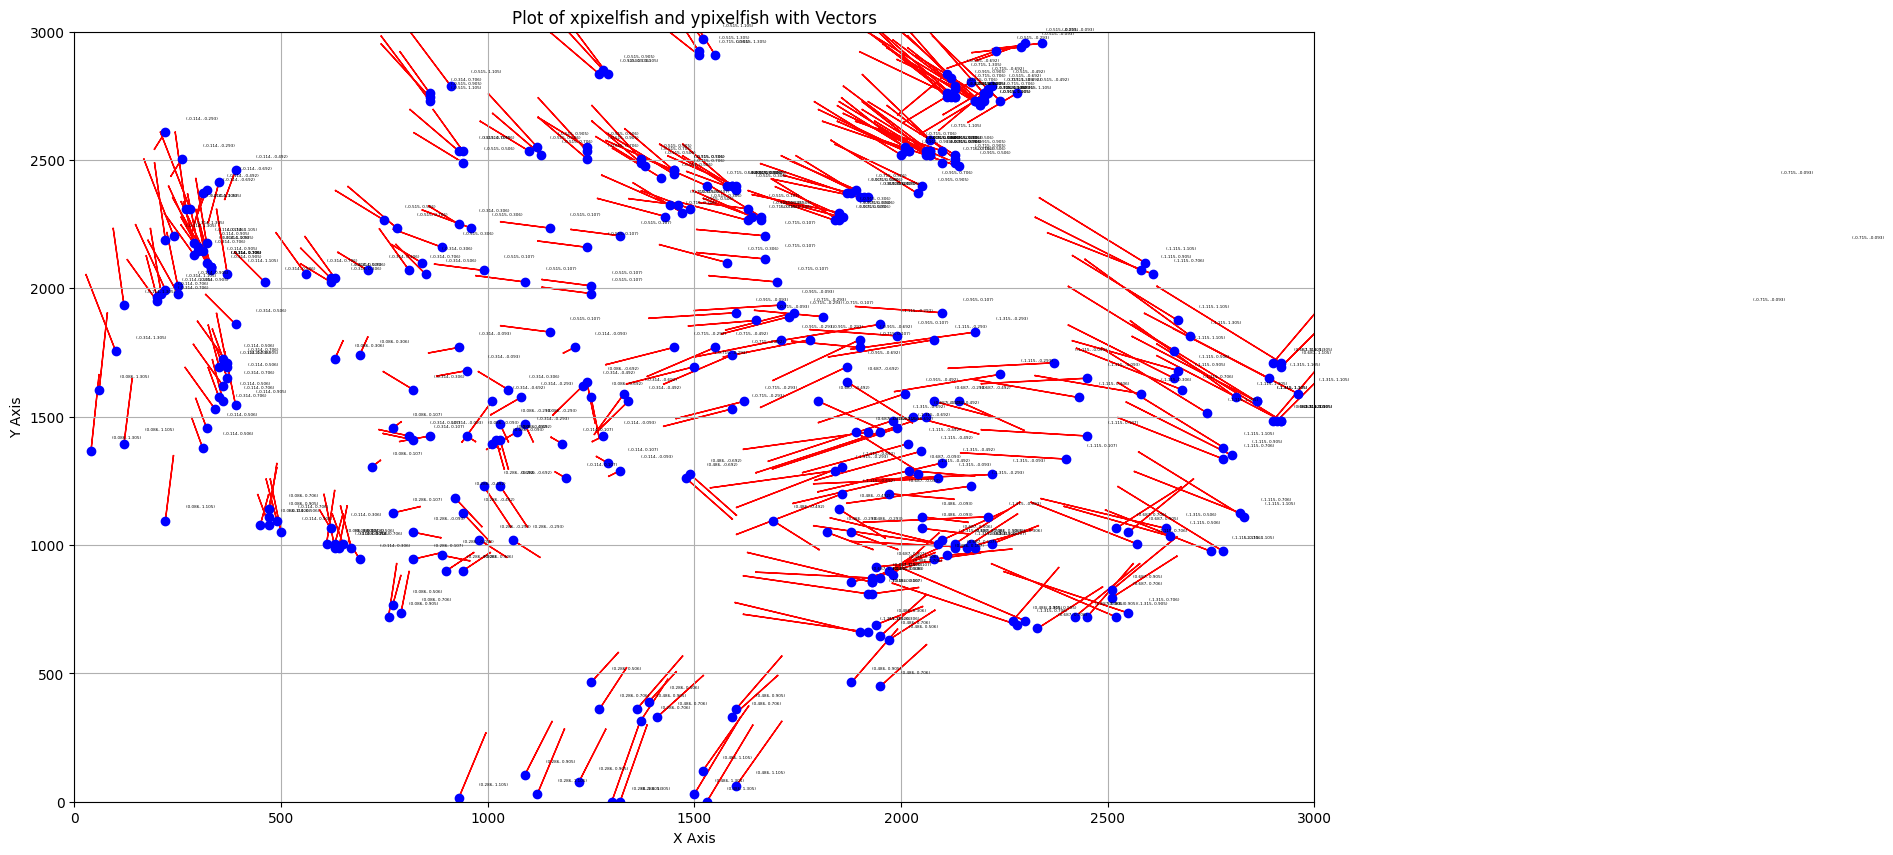

In [159]:


# Increase the size of the plot
plt.figure(figsize=(16, 10))  # Adjust as needed for a larger plot
plt.axis([0, 3000, 0, 3000])

xpixelfish_values = Fisheye_coords[:,0] 
ypixelfish_values = Fisheye_coords[:,1] 
x_values = PTZ_coords[:,0] 
y_values = PTZ_coords[:,1]

# Plot the points
plt.plot(xpixelfish_values, ypixelfish_values, 'bo')  # 'bo' means blue circles, you can change the color or marker as needed

# Calculate the scale based on the maximum values and the size of the plot
max_value = max(np.max(np.abs(x_values)), np.max(np.abs(y_values)))
scale_factor = 0.1 * max(3000, 3000) / max_value

# Plot vectors using arrows
for xpix, ypix, x, y in zip(xpixelfish_values, ypixelfish_values, x_values, y_values):
    plt.arrow(xpix, ypix, x * scale_factor, y * scale_factor, head_width=2, head_length=3, fc='red', ec='red')
    
    # Write truncated x, y values at each point
    truncated_x = '{:.3f}'.format(x)
    truncated_y = '{:.3f}'.format(y)
    plt.text(xpix + 50, ypix + 50, f'({truncated_x}, {truncated_y})', fontsize=3)

# Set labels and title
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Plot of xpixelfish and ypixelfish with Vectors')

# Show plot
plt.grid(True)  # Add grid

# Increase image resolution
plt.savefig('output.png', dpi=300)  # Adjust dpi as needed for higher resolution
plt.show()